In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
#plt.style.use('ggplot')

import matplotlib.pyplot as plt
%matplotlib inline

### ▣ Obtaining Data 

In [2]:
#Load the data
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Check if the data is in correct format/datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


- This dataset has total of 891 rows and 12 columns.
- Right away we can see that there are missing values for age, cabin, and few embarked.
- Let's make the missing values even more obvious. 

In [4]:
#Check datatypes, missing values, unique values and total count for each columns to understand the data better. 
dataDict = pd.DataFrame(df.dtypes, columns=['DataType'])
dataDict['MissingValues'] = df.isnull().sum()
dataDict['UniqueValues'] = df.nunique()
dataDict['TotalRows'] = df.count()
dataDict

,DataType,MissingValues,UniqueValues,TotalRows
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


- Above dataframe can be very helpful for for getting overview of datatypes and missing values. 
- Unique values can be very helpful for wrangling data for machine learning. 

### ▣ Exploring Data 

In [5]:
#Get descriptive statistics on 'numeric' datatypes, which is also default.
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- That tells us various things about each numeric datatype.

In [6]:
#Get descriptive statistics on 'object' datatypes.
df.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Madill, Miss. Georgette Alexandra",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


- That tells us which value is most frequent with number of occurrences for each object datatype.
- Over half the data is mark 'S' for Embarked column, which can be very helpful to know.

In [7]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


C:\Users\Miraj-PC\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


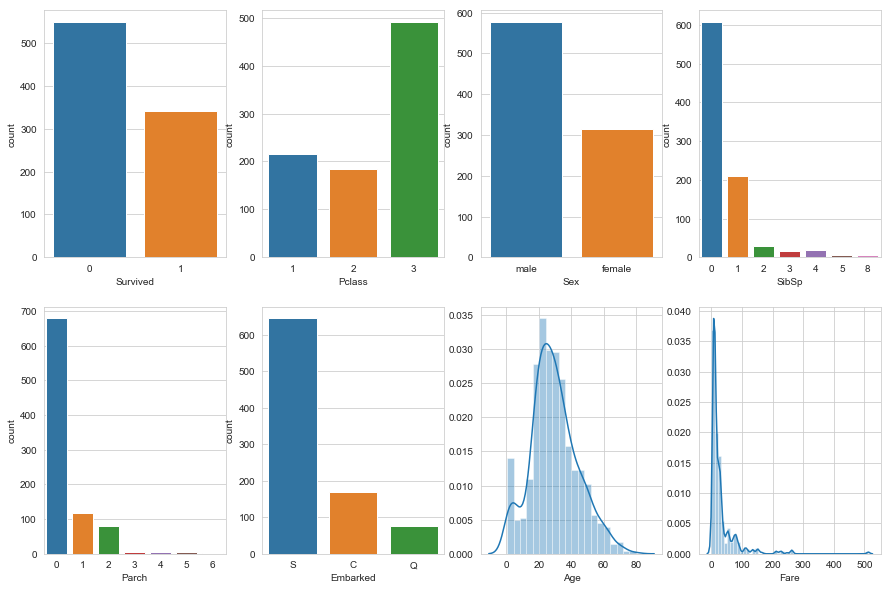

In [8]:
#Lets visualize the dataset by creating a subplot.
fig, axes = plt.subplots(2,4, figsize=(15,10))
sns.countplot('Survived', data=df, ax=axes[0,0])
sns.countplot('Pclass', data=df, ax=axes[0,1])
sns.countplot('Sex', data=df, ax=axes[0,2])
sns.countplot('SibSp', data=df, ax=axes[0,3])
sns.countplot('Parch', data=df, ax=axes[1,0])
sns.countplot('Embarked', data=df, ax=axes[1,1])

#Age and Fare has too many uniques values to graph with bar chart.
sns.distplot(df['Age'].dropna(), ax=axes[1,2])
sns.distplot(df['Fare'], ax=axes[1,3])

- Cabin, Name, and Ticket columns can not be visualize becasue they are not categorical and object datatypes.
- We can conclude many things about each field above:
    - More people died then survive.
    - Pclass 3 has more people than other Pclasses.
    - There are many more Males than Females.
    - Over half the people were single.
    - Almost everyone has Parch of 0.
    - Over half the people were in 'S' Embarked. 
    - Most people on the boat are roughly between the ages of 20 to 40.
    - Almost all the Fare were less than 100 with few outliers. 

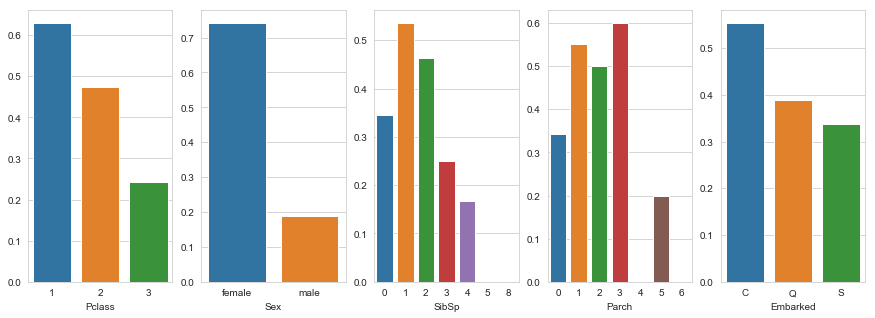

In [9]:
#Lets visualize the categorical fields by survival.
fig, axes = plt.subplots(1,5, figsize=(15,5), sharey=False)
sns.barplot(x=df.groupby('Pclass').Survived.mean().index, y=df.groupby('Pclass').Survived.mean().values, ax=axes[0])
sns.barplot(x=df.groupby('Sex').Survived.mean().index, y=df.groupby('Sex').Survived.mean().values, ax=axes[1])
sns.barplot(x=df.groupby('SibSp').Survived.mean().index, y=df.groupby('SibSp').Survived.mean().values, ax=axes[2])
sns.barplot(x=df.groupby('Parch').Survived.mean().index, y=df.groupby('Parch').Survived.mean().values, ax=axes[3])
sns.barplot(x=df.groupby('Embarked').Survived.mean().index, y=df.groupby('Embarked').Survived.mean().values, ax=axes[4])

Observations: 
- People in Pclass 1 has little over 60% chance of surviving.
- Female has little over 70% chance of surviving compare to male with little under 20% chance of surviving.
- It does not look like SibSp is correlated with surviving in any way.
- Parch 3 has the hightest survival rate compare to other Parches.
- Embarked 'C' has highest chance of surviving with 55%.

-There were more Male than Female however, Female had about 74% chance of surviving compater to Male with about 19%.

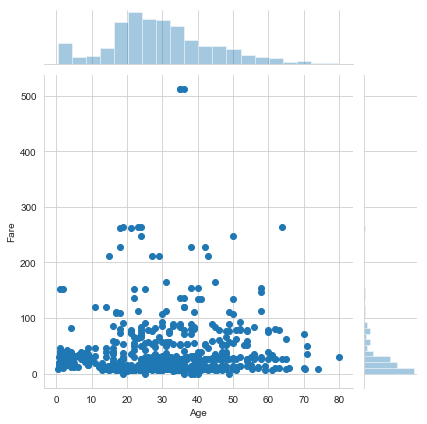

In [10]:
#let's visualize continuous fields
sns.jointplot(x='Age', y='Fare', data=df)

- Age and Fare are not related.

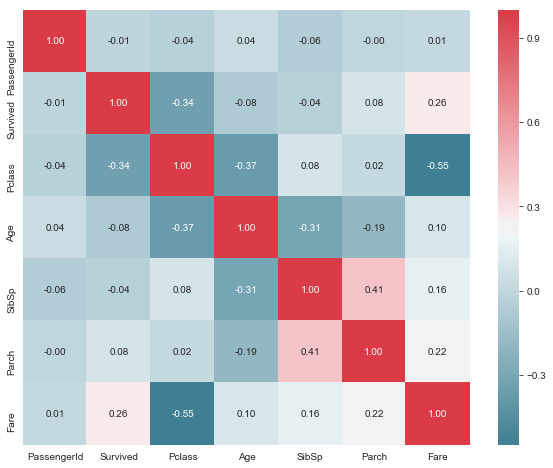

In [11]:
#Lets check what correlates with Survived.
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True), fmt='.2f')

- There is a low coorelation between Survived and Fare. 
- There is also a low negative coorelation between Survived and Pclass. 

### ▣ Data Cleaning 

In [12]:
#Remember Age had missing values
df.Age.isnull().sum()

177

In [13]:
#Lets impute the missing Age values with the mean Age
df.Age.fillna(df.Age.mean(), inplace=True)

In [14]:
#Verify the field
df.Age.isnull().sum()

0

In [15]:
#Remember Fare had the min values of 0
df.Fare.sort_values().head(18)

271    0.0000
597    0.0000
302    0.0000
633    0.0000
277    0.0000
413    0.0000
674    0.0000
263    0.0000
466    0.0000
732    0.0000
179    0.0000
806    0.0000
481    0.0000
822    0.0000
815    0.0000
378    4.0125
872    5.0000
326    6.2375
Name: Fare, dtype: float64

In [16]:
#0.00 fare is technically same as null, so lets replace it with null
df['Fare'].replace(0,np.NaN, inplace=True)
#Now lets check for null values.
df.Fare.isnull().sum()

15

In [17]:
#Lets fill the null values with mean
df['Fare'].fillna(df['Fare'].mean(), inplace=True)
#Verify the field.
df.Fare.isnull().sum()

0

In [18]:
#Remember Cabine also had null values
df.Cabin.isnull().sum()

687

In [19]:
#That is alot of null values. There are 891 total rows and 687 are null.
df['Cabin'].isnull().mean()

0.7710437710437711

In [20]:
#About 77 percent of the row are null. I believe the best option for that field would be to drop it.
df.drop('Cabin', axis=1, inplace=True)

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
#Remember Embarked also had null values
df.Embarked.isnull().sum()

2

In [23]:
df.dropna(inplace=True)

In [24]:
#There should be no null values. Lets make sure for the last time.
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### ▣ Findings from the dataset

**Let's take this time to come up with few questions we would like to answer with this data:**
- How many passengers were male and female? 

#### How many passengers were male and female?

Text(0.5, 1.0, 'Gender Distribution')

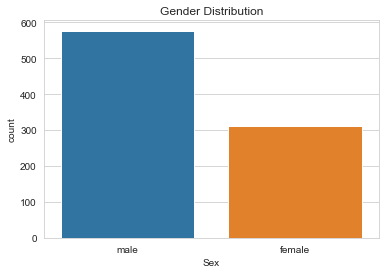

In [25]:
sns.countplot(x='Sex', data=df)

#Give it a title for best practice
plt.title('Gender Distribution')

- There are a lot more males than females.
- Let's see how they distribute by Pclass. 

Text(0.5, 1.0, 'Gender Distribution by Pclass')

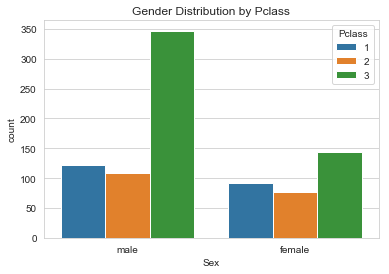

In [26]:
sns.countplot(x='Sex', data=df, hue='Pclass')

#Give it a title for best practice
plt.title('Gender Distribution by Pclass')

- Looks like many people were on third class.
- Surprisingly, more people were on first class than second class. 
- How many of children are in each class?

In [27]:
#Let say a person under the age of 18 is consider a child.
df['Gender_Status'] = df['Age'].apply(lambda x: 'Adult' if x >= 18 else 'Children')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender_Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Adult
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q,Adult
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,Adult
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,Children
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,Adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,Children


In [28]:
df['Gender_Status'].value_counts()

Adult       776
Children    113
Name: Gender_Status, dtype: int64

Text(0.5, 1.0, 'Adult and Children Distribution by Pclass')

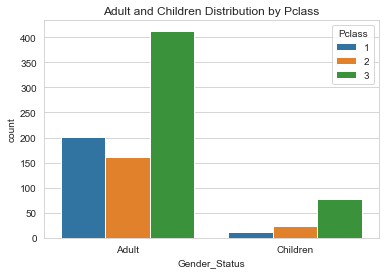

In [29]:
sns.countplot(x='Gender_Status', data=df, hue='Pclass')

#Give it a title for best practice
plt.title('Adult and Children Distribution by Pclass')

- Similar distribution to 'Gender Distribution by Pclass' above.
- Let's check how age is distributed.

Text(0, 0.5, 'Count')

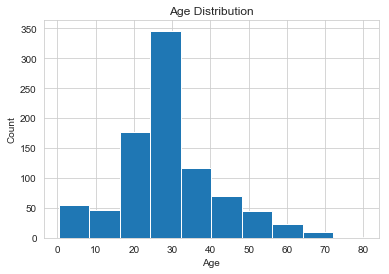

In [30]:
df['Age'].hist()

#Give it a title, x-axis, and y-axis name for best practice
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

- Majority of people are between the age of 20 to 50.
- However, many young adults are on it. 

#### Did gender play a role in survival?

In [31]:
df.head()
df.groupby('Sex').Survived.sum()

Sex
female    231
male      109
Name: Survived, dtype: int64

Text(0, 0.5, 'Count')

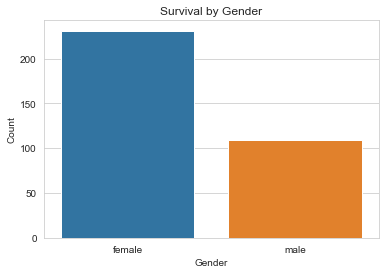

In [32]:
sns.barplot(x=df.groupby('Sex').Survived.sum().index, y=df.groupby('Sex').Survived.sum().values)

#Give it a title, x-axis, and y-axis name for best practice
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

- Gender has definitely played a role in who survived and who did not.
- Females were more likely to survive than males.
- Lets get the survival rate for each gender. 

In [33]:
# To get the survival rate, we have to divide total number of survival for each gender by the total number of each gender.
#Female survival rate
df.groupby('Sex').Survived.sum().values[0]/df.groupby('Sex').Survived.count().values[0]*100

74.03846153846155

In [34]:
#Male survival rate
df.groupby('Sex').Survived.sum().values[1]/df.groupby('Sex').Survived.count().values[1]*100

18.890814558058924

#### Did Pclass play a role in survival?

In [35]:
df.groupby(['Pclass','Survived']).Survived.count()

Pclass  Survived
1       0            80
        1           134
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

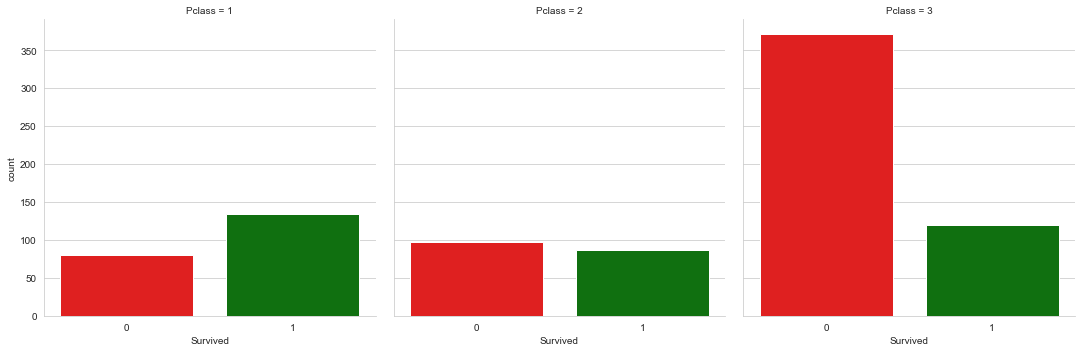

In [36]:
#Survivors by Pclass
sns.catplot('Survived', col='Pclass', data=df, kind='count', palette=["r", "g"])

- Pclass did play a role in survival.
- People in Pclass 1 survived the most; followed by Pclass 3.
- Something to note, alot of people died in Pclass 3, which might be because Pclass 3 had more people than Pclass 1 and Pclass 2.
- Will gender make any differences?

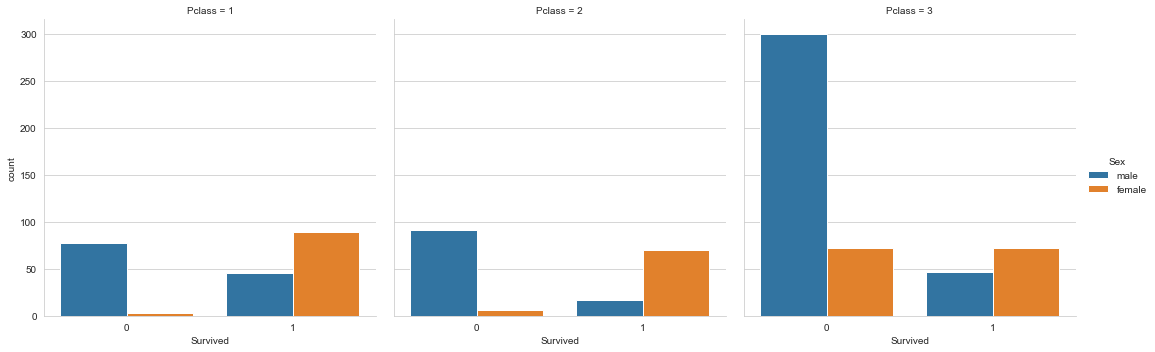

In [37]:
#Survivors by Pclass per Gender
sns.catplot('Survived', col='Pclass', data=df, kind='count', hue='Sex')

- The results are similar, but females in Pclass 3 and 2 are almost equivalent compared to before.
- Lets make sure with actual numbers.

In [38]:
df.groupby(['Pclass','Survived','Sex']).Survived.count()

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     89
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
Name: Survived, dtype: int64

- Interesting thing to note here is that for Pclass 3, exact same number of females survived as those who did not. 
- That is very interesting. 

#### Did having sibling or spouse play a role in survival? 

In [39]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

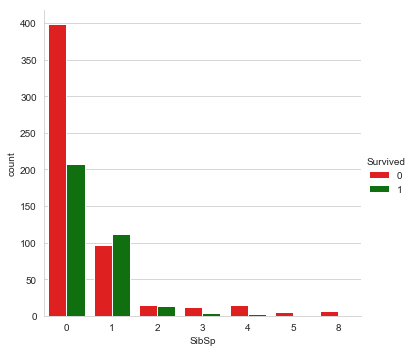

In [40]:
#Survivors by SibSp
sns.catplot('SibSp', data=df, hue='Survived', kind='count', palette=["r", "g"])

In [41]:
#Survival rate by SibSp
df.groupby('SibSp').Survived.sum()/df.groupby('SibSp').Survived.count()*100

SibSp
0    34.323432
1    53.588517
2    46.428571
3    25.000000
4    16.666667
5     0.000000
8     0.000000
Name: Survived, dtype: float64

- It does not look like SibSp played a significant role into who survive and who does not. 
- In fact, if you do not have any family members then you are actually less likely to survive than if you had at least one or two family members.

#### Are Children more likely to survive than adults?

In [42]:
#Survival rate for adult and children
df.groupby('Gender_Status').Survived.sum()/df.groupby('Gender_Status').Survived.count()*100

Gender_Status
Adult       35.953608
Children    53.982301
Name: Survived, dtype: float64

- We might have assumed that children might have higher survival rate because we as human want to protect childrens. 
- Surprisingly, adult and children had almost similar survival rate.

## Conclusions
By doing exploratory analysis of Titanic dataset we can conclude that, gender played a big role into who survive and who does not. In fact, female had 74 percent chance of surviving compared to 19 percent for male. Another factor was Pclass, which is the ticket class. There were three classes we had to analyze. We found that people in 3rd class had the highest chance of surviving followed by 1st and 2nd class. Female also had the highest rate of survival in all three classes compared to males. 